In [1]:
# Importing required libraries
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for advanced data visualization
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
from sklearn.metrics import confusion_matrix    # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report   # Import the classification_report function for detailed classification metrics
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier model
from sklearn.linear_model import LogisticRegression  # Importing Logistic regression classifier
from sklearn.svm import SVC     # Import the SVC class for support vector machine classification
from sklearn.metrics import accuracy_score  # Function to calculate accuracy score

In [2]:
data= pd.read_csv(r"C:\Users\Sarthak Sarkar\Downloads\matches.csv")

In [3]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.tail(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (756, 18)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
data.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
data['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
data['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
data['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
# Replacing 'Rising Pune Supergiants' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)

# Replacing 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.team2.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.toss_winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)

# Replacing 'Delhi Daredevils' with 'Delhi Capitals' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.toss_winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)

# Replacing 'Pune Warriors' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)

In [13]:
data.describe(include ='all')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,12,32,546,11,11,11,2,3,NaN,11,NaN,NaN,226,41,61,65,25
top,NaN,IPL-2013,Mumbai,17-04-2011,Sunrisers Hyderabad,Delhi Capitals,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,76,101,2,106,99,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [14]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [15]:
data['city'].fillna('Unknown', inplace=True)

In [17]:
cols_to_fill = ['player_of_match', 'result']
data[cols_to_fill] = data[cols_to_fill].fillna('Not Available')

In [21]:
data.isnull().sum()

id                   0
Season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [22]:
# Checking the shape of our data after handling null values
data.shape

(756, 18)

In [25]:
# displaying our data
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [26]:
data['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

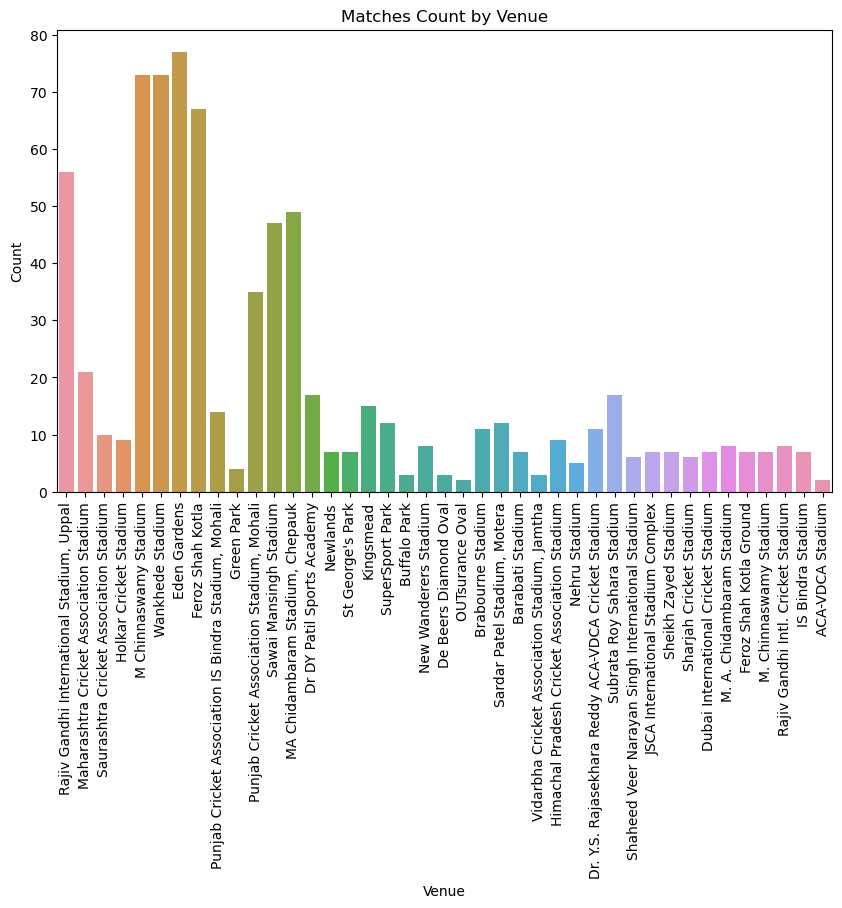

In [27]:
plt.figure(figsize=(10, 6))

# Use Seaborn's countplot to plot the number of matches played at each venue
# The 'x' parameter is set to 'venue', and 'data' specifies the DataFrame to use for plotting
sns.countplot(x='venue', data=data)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Matches Count by Venue')

# Display the plot
plt.show()


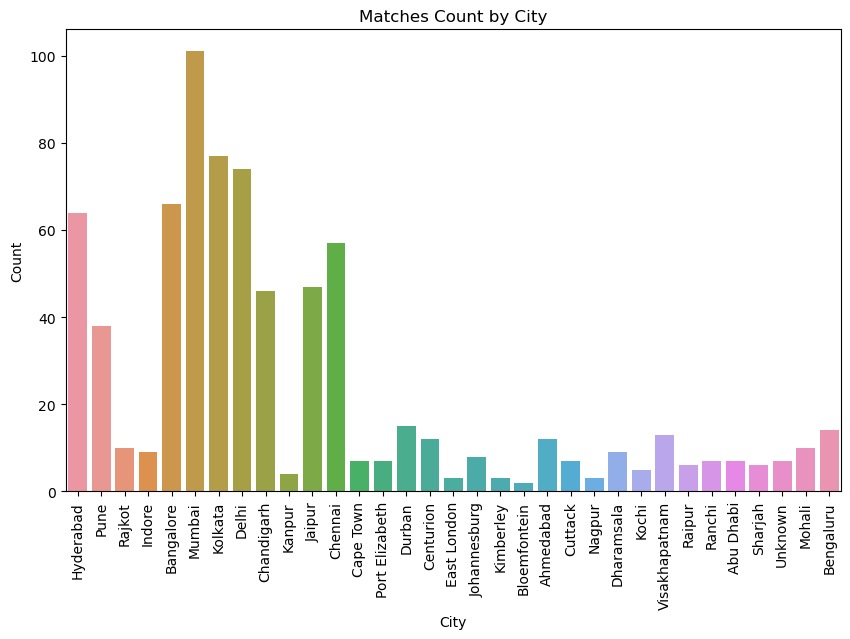

In [28]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's countplot to plot the number of matches played in each city
# The 'x' parameter is set to 'city', and 'data' specifies the DataFrame to use for plotting
sns.countplot(x='city', data=data)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('City')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Matches Count by City')

# Display the plot
plt.show()

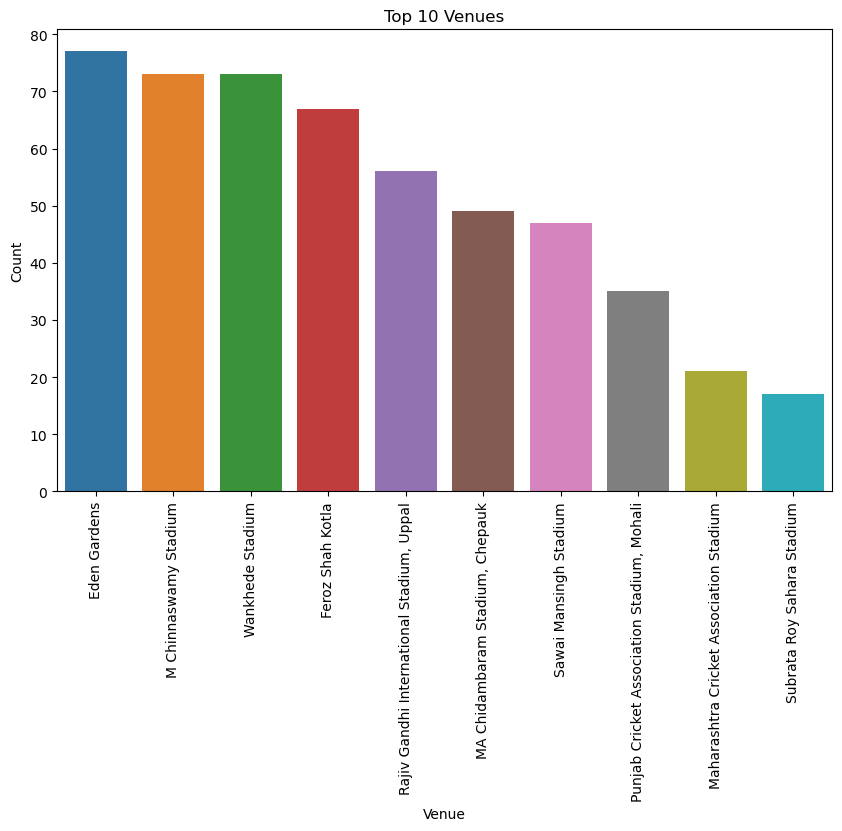

In [29]:
 #Get the top 10 venues with the highest number of matches played
venue_counts = data['venue'].value_counts().head(10)

# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's barplot to plot the count of matches for each of the top 10 venues
# The 'x' parameter is set to the venue names (index of venue_counts), and 'y' is set to the corresponding match counts (values of venue_counts)
sns.barplot(x=venue_counts.index, y=venue_counts.values)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Venues')

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


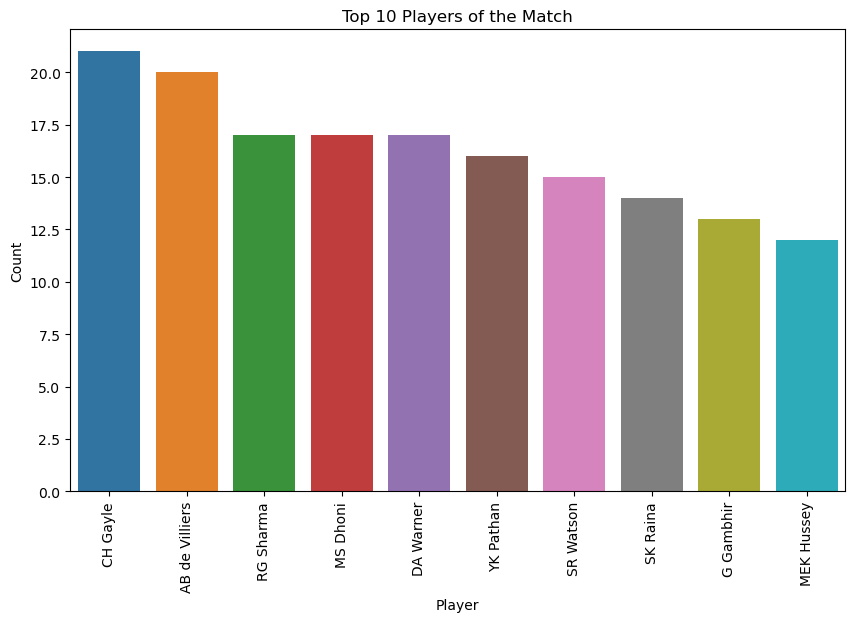

In [30]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Get the top 10 players with the highest number of "Player of the Match" awards
top_players = data['player_of_match'].value_counts().head(10)

# Use Seaborn's barplot to plot the count of "Player of the Match" awards for each of the top 10 players
# The 'x' parameter is set to the player names (index of top_players), and 'y' is set to the corresponding award counts (values of top_players)
sns.barplot(x=top_players.index, y=top_players.values)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('Player')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Players of the Match')

# Display the plot
plt.show()

TypeError: can only concatenate str (not "float") to str

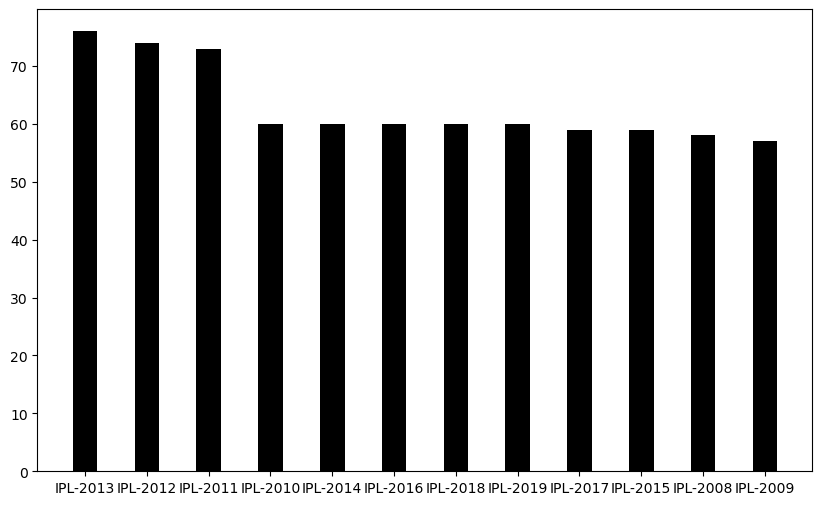

In [35]:
# Matches and Results by Season
season_matches = data['Season'].value_counts()
season_results = data['winner'].groupby(data['Season']).value_counts().unstack(fill_value=0)

# Plotting Matches and Results by Season
plt.figure(figsize=(10, 6))
bar_width = 0.4

plt.bar(season_matches.index, season_matches.values, width=bar_width, color='black', label='Matches')
plt.bar(season_results.index + bar_width, season_results.values.sum(axis=1), width=bar_width, color='blue', label='Results')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Matches and Results by Season')
plt.legend()
plt.xticks(rotation=90)
plt.show()


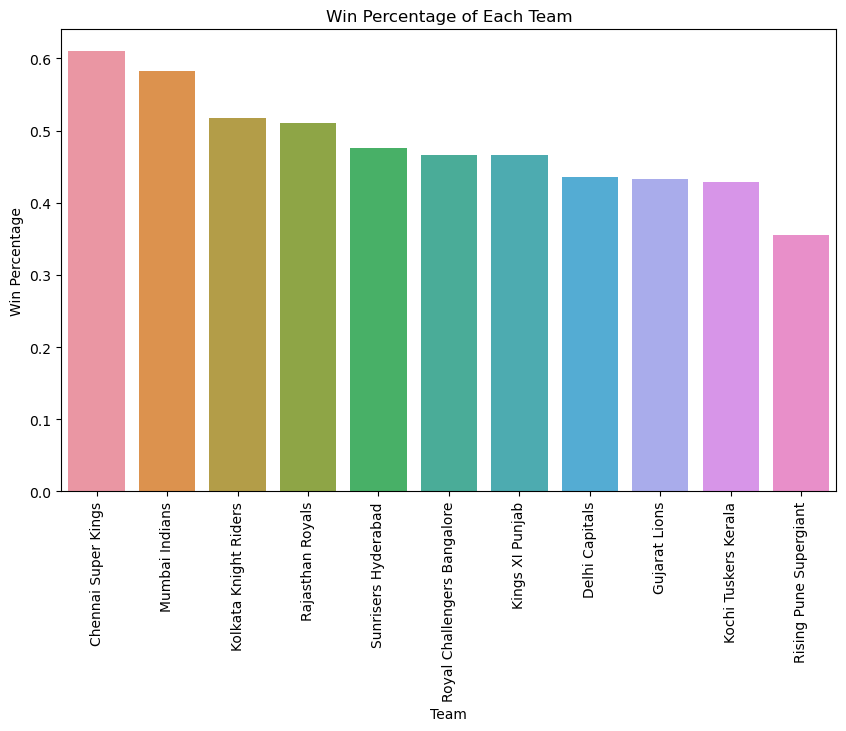

In [36]:
# Calculate win percentage for each team
team_wins = data['winner'].value_counts()
team_matches = data['team1'].value_counts() + data['team2'].value_counts()
win_percentage = (team_wins / team_matches).sort_values(ascending=False)

# Plot win percentage for each team
plt.figure(figsize=(10, 6))
sns.barplot(x=win_percentage.index, y=win_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')
plt.show()


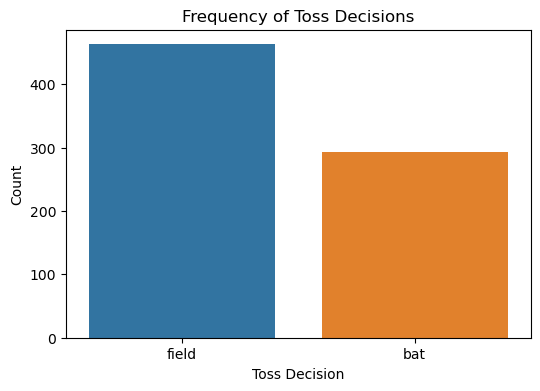

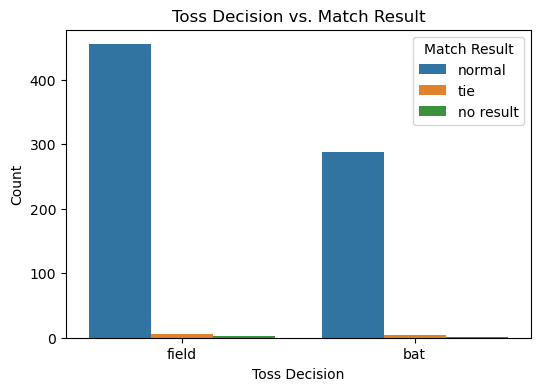

In [37]:
# Toss Decision Frequency
toss_decision_counts = data['toss_decision'].value_counts()

# Plot the frequency of toss decisions
plt.figure(figsize=(6, 4))
sns.countplot(x='toss_decision', data=data)
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title('Frequency of Toss Decisions')
plt.show()

# Toss Decision vs. Match Result
plt.figure(figsize=(6, 4))
sns.countplot(x='toss_decision', hue='result', data=data)
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title('Toss Decision vs. Match Result')
plt.legend(title='Match Result', loc='upper right')
plt.show()


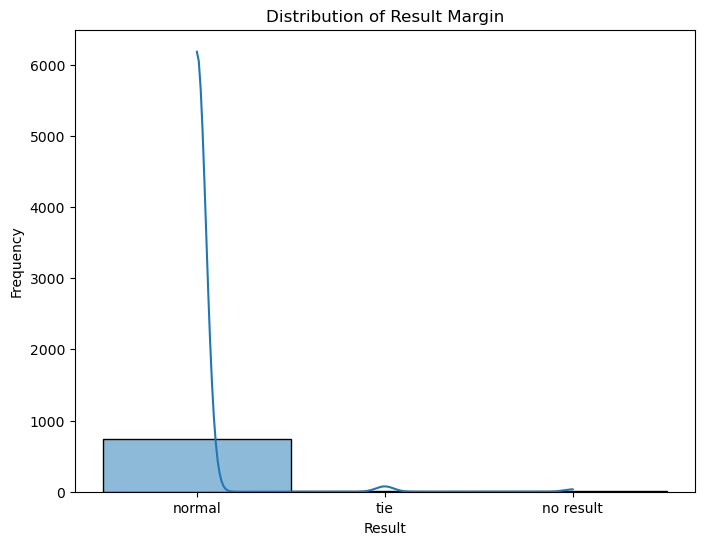

In [39]:
# Distribution of Result Margin
plt.figure(figsize=(8, 6))
sns.histplot(data['result'], bins=20, kde=True)
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Distribution of Result Margin')
plt.show()

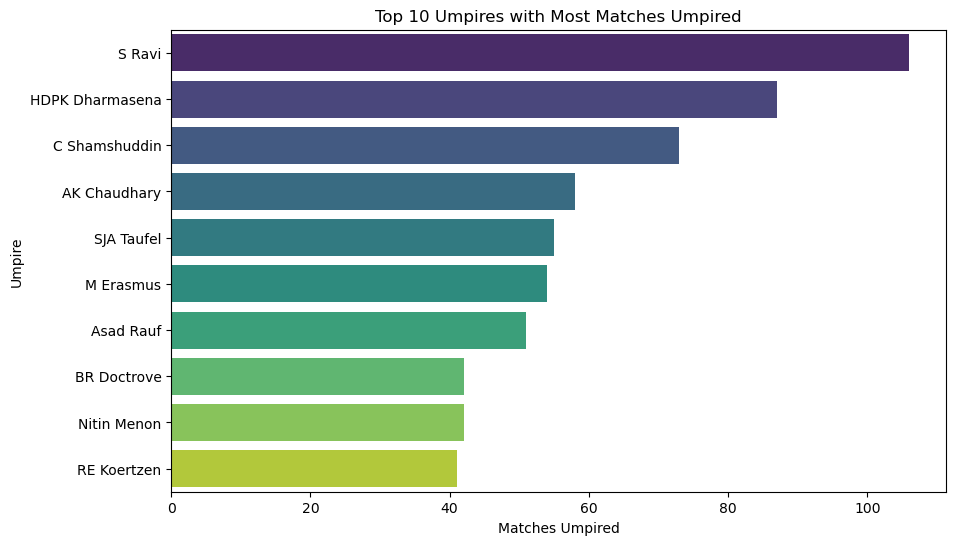

In [40]:
# Umpire-wise Analysis
umpire1_counts = data['umpire1'].value_counts().reset_index()
umpire1_counts.columns = ['umpire', 'matches_umpired']

umpire2_counts = data['umpire2'].value_counts().reset_index()
umpire2_counts.columns = ['umpire', 'matches_umpired']

# Combine counts from umpire1 and umpire2
umpire_counts = umpire1_counts.merge(umpire2_counts, on='umpire', how='outer')
umpire_counts['matches_umpired'] = umpire_counts['matches_umpired_x'].fillna(0) + umpire_counts['matches_umpired_y'].fillna(0)
umpire_counts = umpire_counts[['umpire', 'matches_umpired']]
umpire_counts = umpire_counts.sort_values(by='matches_umpired', ascending=False).head(10)

# Plotting Umpire-wise Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='matches_umpired', y='umpire', data=umpire_counts, palette='viridis')
plt.xlabel('Matches Umpired')
plt.ylabel('Umpire')
plt.title('Top 10 Umpires with Most Matches Umpired')
plt.show()

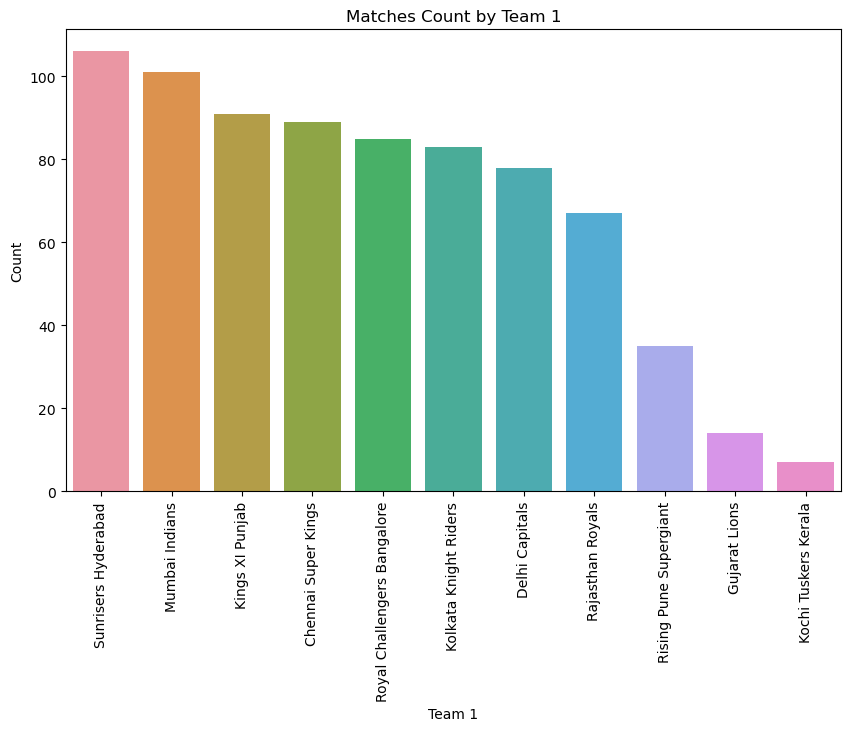

In [41]:
# Team 1
team1_counts = data['team1'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='team1', data=data, order=team1_counts.index)
plt.xlabel('Team 1')
plt.ylabel('Count')
plt.title('Matches Count by Team 1')
plt.xticks(rotation=90)
plt.show()

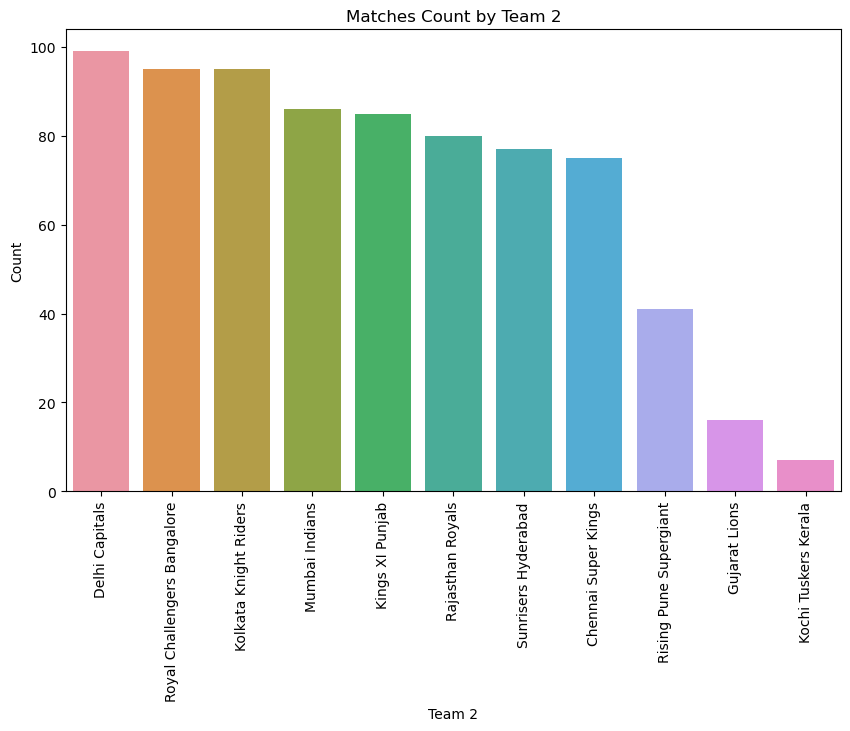

In [42]:
# Team 2
team2_counts = data['team2'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='team2', data=data, order=team2_counts.index)
plt.xlabel('Team 2')
plt.ylabel('Count')
plt.title('Matches Count by Team 2')
plt.xticks(rotation=90)
plt.show()

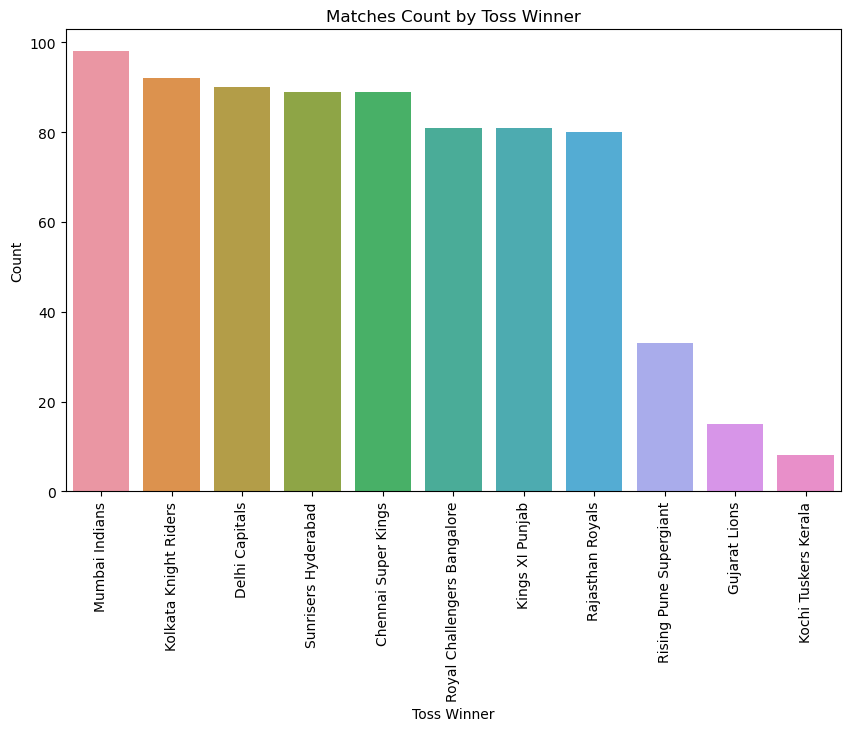

In [43]:
# Toss Winner
toss_winner_counts = data['toss_winner'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', data=data, order=toss_winner_counts.index)
plt.xlabel('Toss Winner')
plt.ylabel('Count')
plt.title('Matches Count by Toss Winner')
plt.xticks(rotation=90)
plt.show()


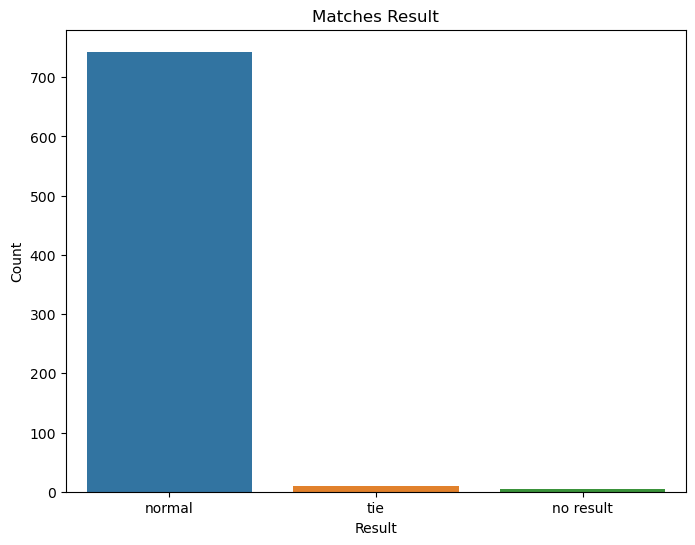

In [44]:
# Result
result_counts = data['result'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=data, order=result_counts.index)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Matches Result')
plt.show()

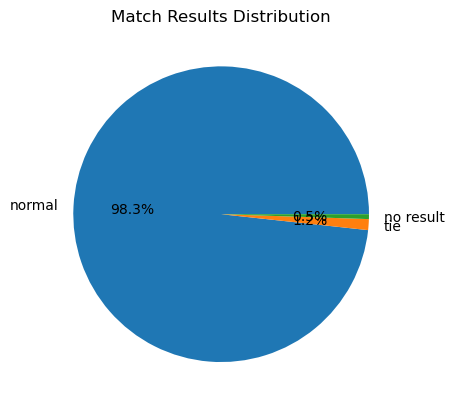

In [45]:
# Pie Chart
plt.pie(data['result'].value_counts(), labels=data['result'].value_counts().index, autopct='%1.1f%%')
plt.title('Match Results Distribution')
plt.show()


In [48]:
# Cross-tabulation
cross_tab = pd.crosstab(data['team1'], data['winner'])
print(cross_tab)

winner                       Chennai Super Kings  Delhi Capitals  \
team1                                                              
Chennai Super Kings                           51               4   
Delhi Capitals                                 6              28   
Gujarat Lions                                  0               3   
Kings XI Punjab                                5               8   
Kochi Tuskers Kerala                           0               0   
Kolkata Knight Riders                          8               7   
Mumbai Indians                                 6               7   
Rajasthan Royals                               7               5   
Rising Pune Supergiant                         1               2   
Royal Challengers Bangalore                    9               4   
Sunrisers Hyderabad                            7               9   

winner                       Gujarat Lions  Kings XI Punjab  \
team1                                               

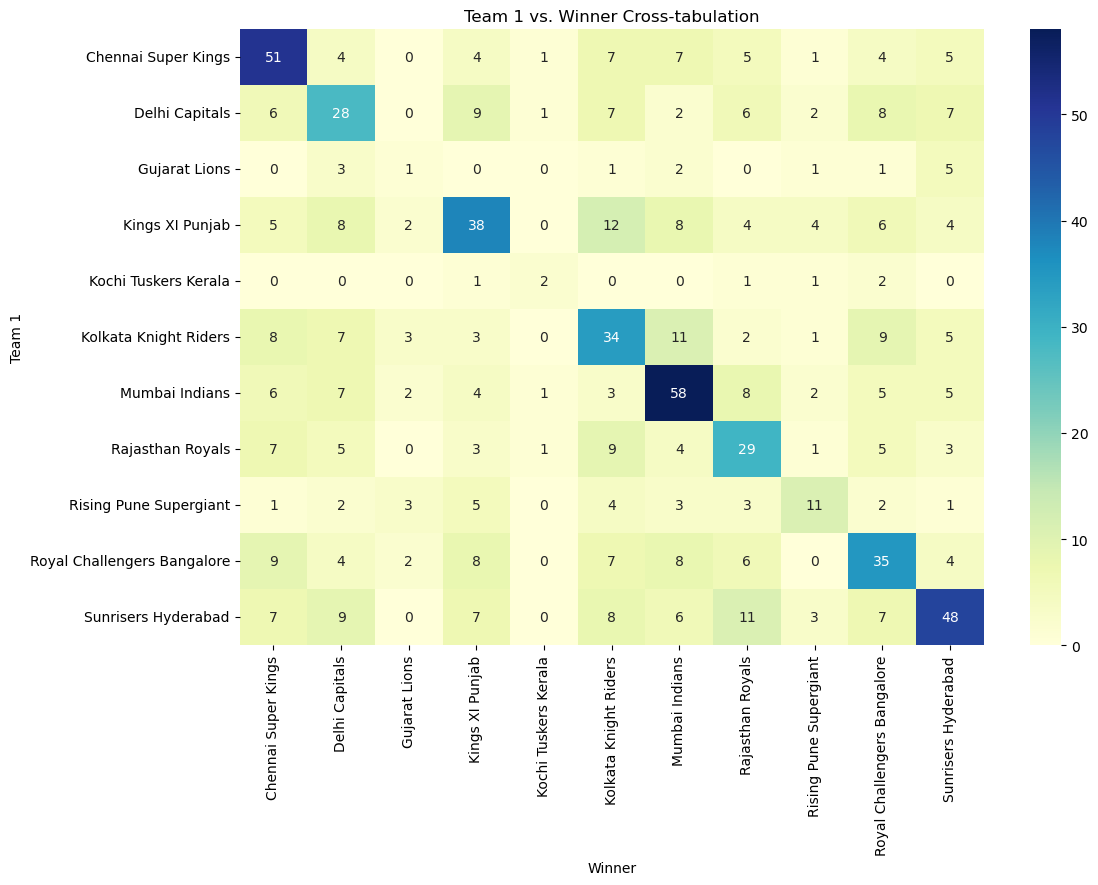

In [49]:
# Cross-tabulation
cross_tab = pd.crosstab(data['team1'], data['winner'])

# Plotting Heatmap for Cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Winner')
plt.ylabel('Team 1')
plt.title('Team 1 vs. Winner Cross-tabulation')
plt.show()

In [51]:
data.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [52]:
data['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kochi Tuskers Kerala', nan], dtype=object)

In [53]:
# Create a dictionary to map team names to unique numbers
team_mapping = {
    'Kolkata Knight Riders': 1,
    'Chennai Super Kings': 2,
    'Delhi Capitals': 3,
    'Royal Challengers Bangalore': 4,
    'Rajasthan Royals': 5,
    'Kings XI Punjab': 6,
    'Sunrisers Hyderabad': 7,
    'Mumbai Indians': 8,
    'Rising Pune Supergiant': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Lions': 11
}

# Replace team names in 'team1' and 'team2' columns with unique numbers
data['team1'] = data['team1'].map(team_mapping)
data['team2'] = data['team2'].map(team_mapping)

# Replace winner names in 'winner' column with unique numbers
data['winner'] = data['winner'].map(team_mapping)
data['toss_winner'] = data['toss_winner'].map(team_mapping)

In [54]:
data['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [55]:
venue_mapping = {venue: i for i, venue in enumerate(data['venue'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['venue'] = data['venue'].map(venue_mapping)

In [56]:
data['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [57]:
# Create a dictionary to map 'toss_decision' values to numerical values
temp = {'field': 0, 'bat': 1}

# Use the map() function to replace 'toss_decision' values with numerical values
data['toss_decision'] = data['toss_decision'].map(temp)

In [58]:
# Create a set of unique umpires
umpires_set = set(data['umpire1'].unique()).union(set(data['umpire2'].unique()))

# Create a dictionary to map umpire names to unique numbers
umpire_dict = {umpire: i for i, umpire in enumerate(umpires_set, 1)}

# Apply the dictionary to create new encoded columns for 'umpire1' and 'umpire2'
data['umpire1'] = data['umpire1'].map(umpire_dict)
data['umpire2'] = data['umpire2'].map(umpire_dict)

In [59]:
# Create a dictionary to map each unique venue name to a unique number
player_of_match_mapping = {venue: i for i, venue in enumerate(data['player_of_match'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['player_of_match'] = data['player_of_match'].map(player_of_match_mapping)
# Create a dictionary to map each unique venue name to a unique number
city_mapping = {venue: i for i, venue in enumerate(data['city'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['city'] = data['city'].map(city_mapping)

In [60]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,0,05-04-2017,7,4,4,0,normal,0,7.0,35,0,0,0,62,30,NaN
1,2,IPL-2017,1,06-04-2017,8,9,9,0,normal,0,9.0,0,7,1,1,29,74,NaN
2,3,IPL-2017,2,07-04-2017,11,1,1,0,normal,0,1.0,0,10,2,2,49,42,NaN
3,4,IPL-2017,3,08-04-2017,9,6,6,0,normal,0,6.0,0,6,3,3,56,72,NaN
4,5,IPL-2017,4,08-04-2017,4,3,4,1,normal,0,4.0,15,0,4,4,71,71,NaN


<Axes: >

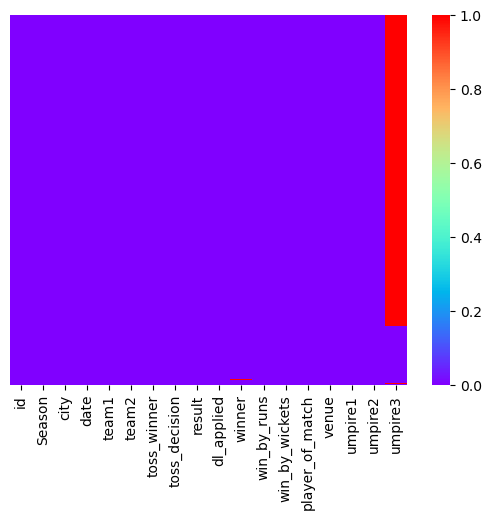

In [62]:
sns.heatmap(data.isnull(),cmap='rainbow',yticklabels=False)

In [63]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['winner'], axis=1)
y = data['winner']

In [64]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (604, 17)
y_train shape: (604,)
X_test shape: (152, 17)
y_test shape: (152,)


In [72]:
# Function to get user input for prediction
def get_user_input():
#     City = input("Enter the city: ")
#     Player_of_match = input("Enter the player of the match: ")
#     Venue = input("Enter the venue: ")
#     Neutral_venue = int(input("Is it a neutral venue? (0 for No, 1 for Yes): "))
#     Team1 = input("Enter the first team: ")
#     Team2 = input("Enter the second team: ")
#     Toss_winner = input("Enter the toss winner: ")
#     Toss_decision = input("Enter the toss decision (bat or field): ")
#     Result_margin = float(input("Enter the result margin: "))
#     Umpire1 = input("Enter the name of the first umpire: ")
#     Umpire2 = input("Enter the name of the second umpire: ")

    City = "Bangalore"
    Player_of_match = "BB McCullum"
    Venue = "M Chinnaswamy Stadium"
    Neutral_venue = 0
    Team1 = "Royal Challengers Bangalore"
    Team2 = "Chennai Super Kings"
    Toss_winner = "Royal Challengers Bangalore"
    Toss_decision = "field"
    Result_margin = 4.00
    Umpire1 = "Aleem Dar"
    Umpire2 = "SL Shastri"


    # Display the user input and win probability for Team 1
    print("\n\nUser Input:")
    print(f"City: {City}")
    print(f"Player of the Match: {Player_of_match}")
    print(f"Venue: {Venue}")
    print(f"Neutral Venue: {'Yes' if Neutral_venue == 1 else 'No'}")
    print(f"Team 1: {Team1}")
    print(f"Team 2: {Team2}")
    print(f"Toss Winner: {Toss_winner}")
    print(f"Toss Decision: {Toss_decision}")
    print(f"Umpire1: {Umpire1}")
    print(f"Umpire2: {Umpire2}")
    print("\n")

    # Map user input to numerical forms based on the mappings
    city_numeric = city_mapping.get(City, -1)
    player_of_match_numeric = player_of_match_mapping.get(Player_of_match, -1)
    venue_numeric = venue_mapping.get(Venue, -1)
    team1_numeric = team_mapping.get(Team1,-1)
    team2_numeric = team_mapping.get(Team2,-1)
    toss_winner_numeric = team_mapping.get(Toss_winner,-1)
    toss_decision_numeric = temp.get(Toss_decision,-1)
    umpire1_numeric = umpire_dict.get(Umpire1,-1)
    umpire2_numeric = umpire_dict.get(Umpire2,-1)

    user_data = pd.DataFrame({
        'city': [city_numeric],
        'player_of_match': [player_of_match_numeric],
        'venue': [venue_numeric],
        'neutral_venue': [Neutral_venue],
        'team1': [team1_numeric],
        'team2': [team2_numeric],
        'toss_winner': [toss_winner_numeric],
        'toss_decision': [toss_decision_numeric],
        'result_margin': [Result_margin],
        'umpire1': [umpire1_numeric],
        'umpire2': [umpire2_numeric]
    })

    return user_data
# Function to make predictions on user input
def make_predictions(user_data):
    # Make predictions on the user input data
    predictions = model.predict(user_data)

    # Get the probability of winning for the 1st team (team1)
    win_probability_team1 = predictions[0]

    # Convert probability to percentage
    win_probability_percentage_team1 = win_probability_team1 * 10

    return win_probability_percentage_team1
# Main function to run the predictive system
def main():
    print("Welcome to the IPL Match Winner Predictor!")

    #while True:
    user_data = get_user_input()
    win_probability_team1 = make_predictions(user_data)

    # Display the win probability for the 1st team (team1)
    print(f"Win Probability for Team 1: {win_probability_team1:.2f}%")
    win_probability_team2 = 100-win_probability_team1
    print(f"Win Probability for Team 2: {win_probability_team2:.2f}%")    

        # Ask if the user wants to make another prediction
#         another_prediction = input("\n\nDo you want to make another prediction? (yes or no): ")
#         if another_prediction.lower() != 'yes':
#             break

    print("\n\nThank you for using the IPL Match Winner Predictor!")

if __name__ == "__main__":
    main()

Welcome to the IPL Match Winner Predictor!


User Input:
City: Bangalore
Player of the Match: BB McCullum
Venue: M Chinnaswamy Stadium
Neutral Venue: No
Team 1: Royal Challengers Bangalore
Team 2: Chennai Super Kings
Toss Winner: Royal Challengers Bangalore
Toss Decision: field
Umpire1: Aleem Dar
Umpire2: SL Shastri




ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- neutral_venue
- result_margin
Feature names seen at fit time, yet now missing:
- Season
- date
- dl_applied
- id
- result
- ...
